In [15]:
#Find frauds using unsupervised SOM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [18]:
#Training Self Organising Maps
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

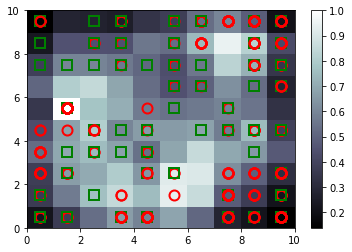

In [19]:
#Visualisation
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g'] #red circles approval not given and green squares approval given
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [20]:
# Find frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,5)], mappings[(5,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [21]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15739548
15699839
15648069
15672894
15783883
15756538
15651868
15801473
15694666
15728523
15716082
15699238
15593959
15651460
15672637
15794204
15734008
15592999
15757434
15769548
15742009
15752344
15736533
15673907
15737909
15779207
15611409
15752578
15721504
15636454
15608916
15615296
15805261
15789611
15738487
15773421
15781875
15809837
15761554
15793825
15811690
15815095
15772941
15750104
15759387


In [22]:
#Going from unsupervised to supervised learning
customers = dataset.iloc[:, 1:].values

In [23]:
#create dependent variables
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [25]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [26]:
ann = tf.keras.models.Sequential()
#add input and first hidden layer
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
#add output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#Compile
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 894us/step - loss: 0.8338 - accuracy: 0.6043
Epoch 2/10
690/690 [==============================] - 1s 902us/step - loss: 0.5032 - accuracy: 0.8812
Epoch 3/10
690/690 [==============================] - 1s 896us/step - loss: 0.3783 - accuracy: 0.9275
Epoch 4/10
690/690 [==============================] - 1s 916us/step - loss: 0.3186 - accuracy: 0.9333
Epoch 5/10
690/690 [==============================] - 1s 955us/step - loss: 0.2837 - accuracy: 0.9333
Epoch 6/10
690/690 [==============================] - 1s 941us/step - loss: 0.2565 - accuracy: 0.9348
Epoch 7/10
690/690 [==============================] - 1s 929us/step - loss: 0.2280 - accuracy: 0.9348
Epoch 8/10
690/690 [==============================] - 1s 935us/step - loss: 0.1905 - accuracy: 0.9348
Epoch 9/10
690/690 [==============================] - 1s 930us/step - loss: 0.1561 - accuracy: 0.9391
Epoch 10/10
690/690 [==============================] - 1s 944us/step - loss: 0.136

In [27]:
#Predict probabilities of fraud
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [28]:
print(y_pred)

[[1.57901130e+07 2.39729881e-04]
 [1.56921370e+07 5.35100698e-04]
 [1.58052120e+07 7.41779804e-04]
 ...
 [1.56514600e+07 6.63974643e-01]
 [1.56114090e+07 6.80615425e-01]
 [1.56364540e+07 7.16349006e-01]]
